# Assignment 2

**Deadline**:  18/09/2019, 9.59am

**Names and student numbers:**
1. Vien Dinh (11002115)
2. Dante van der Heijden (11020075)
3. Jorrim Prins (11038934)

**Declaration of Originality**

We whose names are given under 1., 2. and 3. above declare that:
1. These solutions are solely our own work.
2. We have not made (part of) these solutions available to any other student.

## Instructions for completing and submitting the assignment
Please pay attention to the following instructions:
1. Please follow carefully the steps outlined in the assignment. If you cannot solve an exercise and this hinders continuing with subsequent exercises, try to find a way to work around it and give a clear explanation for the solution you have chosen.
2. Submit your work in the form of a Jupyter notebook via Canvas, before the deadline. Your notebook should not give errors when executed with `Run All`.
4. You are allowed to work on the assignment in groups of 2 or 3 students and to submit together. Before you submit, you and your team members have to register as an **Assignment group** on Canvas. Only a single member of each group has to submit the notebook. Please do **NOT** submit the same notebook multiple times!
5. Please write your names also inside this markdown cell, under **Names and student numbers**.

## Analysis, visualisation and usage of Twitter sentiment data
This part of the assignment deals with the analysis, visualisation and usage of Twitter sentiment data for six airline companies:

|**Name Airline**|**@username**|
|:-------|:-------------|
|American Airlines       |@AmericanAir           |
|JetBlue Airways        |@JetBlue              |
|Southwest Airlines       |@SouthwestAir           |
|United Airlines        |@united              |
|US Airways        |@USAirways              |
|Virgin America       |@VirginAmerica             |

The dataset `airline_twitter_sentiment_clean.csv` consists of more than 14.000 tweets sent on 9 consecutive days in February 2015, all addressing one (or more) of the aforementioned airlines via the @username syntax. The text of the tweets can be found in the `text` column of the dataset. Furthermore, a machine learning algorithm has analyzed the content of the tweets and categorized the sentiment as positive, neutral or negative. This can be found in the `airline_sentiment` column. The machine learning algorithm also estimates the probability that it identified the correct sentiment, which is given in the `airline_sentiment:confidence` column. Another relevant column is called `tweet_created`, giving the time and day at which the tweet was sent.

Our goal is to create for each airline a table with the number of positive, neutral and negative tweets for each hour during the 9 days for which we have data, and to extract some basic insights from the results.

(Note: US Airways was integrated into American Airlines in October 2015. Since our dataset is from February 2015, we will consider them as separate airlines.)

**Exercise 1:** import the relevant libraries.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import re

**Exercise 2:** import the dataset `airline_twitter_sentiment_clean.csv` and turn it into a DataFrame called `df`. This dataset was created on the basis of the dataset of assignment 1, from which duplicates were removed, as well as rows with missing `airline_sentiment`. Notice that rows with an `airline_sentiment:confidence` below 0.50 were **not** removed, as opposed to what you had to do in assignment 1. Print the total number of tweets in the dataset.

In [40]:
df = pd.read_csv('airline_twitter_sentiment_clean.csv')
len(df)

14604

**Exercise 3:** the column `airline_sentiment:confidence` represents the probability that the `airline_sentiment` (positive, neutral or negative) was correctly extracted from the text of the tweet. As in assignment 1, we would like to remove the rows with a probability that is too low. But what is "too low"? 

Answer this exercise in three steps, using the three cells below:
* in the first cell, analyze the distribution of probabilities in the column `airline_sentiment:confidence`. How you do this, is up to you. The goal is to present as clearly as possible how the probabilities are distributed. Your answer must contain (at least) one visualization of data.
* the second cell is a markdown cell, where you have to give an answer in plain text. Propose a criterium for removing data with low probabilities. Which criterium you decide to choose, is up to your judgement. Also, explain why you have chosen your criterium. The explanation should be rational and data-driven.
* in the third cell, remove the lines from `df` with an airline-sentiment confidence that is too low according to your criterium. Report the number of discarded tweets.

The mean of the confidence is 0.9002124349493263 with a minimum of 0.335 and a maximum of 1.0
The standard error of the confidence is 0.16279894778311313
The 5 most occuring confidence values are 
 1.0000    10421
0.6667       71
0.6632       34
0.6559       30
0.6596       30
Name: airline_sentiment:confidence, dtype: int64


Text(0.5,1,'Distribution of confidence values')

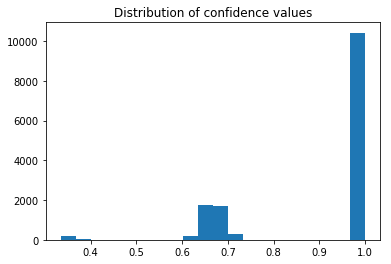

In [41]:
asc = df['airline_sentiment:confidence']
print('The mean of the confidence is',np.mean(asc), 'with a minimum of',np.min(asc), 'and a maximum of', np.max(asc))
print('The standard error of the confidence is', np.sqrt(np.cov(asc)))
print('The 5 most occuring confidence values are \n', asc.value_counts().head())

fig1 = plt.figure()
ax1= fig1.add_subplot(1,1,1)

ax1.hist(asc,bins=20)
ax1.set_title("Distribution of confidence values")



#### ANSWER IN PLAIN TEXT: ####


As we can obviously see in the histogram, almost all of the confidence values are exactly equal to 1.0000. There is a small peak of values between 0.6 and 0.75 but these values are statistically irrelevant as they only make up (14604 - 10421 = 4183) 29% of the set. It is also logical to drop these lower values because a 70% certainty of the correct label on a tweet is not very believable.

In [42]:
tweetcount = len(df)
df = df[df['airline_sentiment:confidence'] == 1]
tweetcount_new = len(df)
df.reset_index()
print(tweetcount - tweetcount_new, 'tweets were deleted')

4183 tweets were deleted


**Exercise 4:** add a new column called `tweet_length` to the DataFrame `df`. This column should contain the normalized length of the text of the tweet. "Normalized" should be understood as follows: the mean of all values in the `tweet_length` column must be zero, and the standard deviation must be one.

In [43]:
mean_tl = df['text'].str.len().mean()
var_tl = df['text'].str.len().var()

df['tweet_length'] = (df['text'].str.len() - mean_tl)/np.sqrt(var_tl)

**Example:** the `pandas.Series.apply()` function can be used to apply a function to the individual values of a Series. The function that acts on the individual values should be given in the argument of `apply()`. The function `apply()` returns a Series of the same length as the original Series.

As an example, in the cell below we have defined a function called `transform_airline_sentiment` and used `apply()` to let it act on the values of the `airline_sentiment` column of `df`. The function `transform_airline_sentiment` transforms `negative` into `-1`, `neutral` into `0` and `positive` into `1`. We printed the first 10 elements of the Series that is returned by `apply()`.

In [44]:
def transform_airline_sentiment(x):
    
    if x == 'negative':
        return -1
    elif x == 'neutral':
        return 0
    else:
        return 1
    
df['airline_sentiment'].apply(transform_airline_sentiment).head(10)

0    -1
1    -1
2     0
3    -1
4    -1
5     0
6     1
7     0
9    -1
11   -1
Name: airline_sentiment, dtype: int64

**Exercise 5:** the `tweet_coord` column of `df` gives (for some tweets) the latitude and longitude of the position where the tweet was created. However, the data is stored as a string, making it hard to do geographical analysis. Add two new columns to `df`, called `latitude` and `longitude`, respectively giving the latitude and longitude of the position where the tweet was created. The values in the new columns should be of float type. Missing `tweet_coord` values can be neglected, i.e. they can remain NaN in the two new columns as well.

Hints:
* you may want to use the `apply()` function of the previous example. 
* in that case, one option would be to write a function that extracts the latitude from the individual values in `tweet_coord`, and another function that extracts the longitude from the individual values in `tweet_coord`.
* regular expressions can be used for extracting the latitude and longitude from the individual values in `tweet_coord`.

In [45]:
def splitter_lat(string):
    if string is not np.nan:
        string = str(string)
        lat = string.split(',')[0].split('[')[1]
        return lat
    else:
        return np.nan

def splitter_long(string):
    if string is not np.nan:
        string = str(string)
        long = string.split(',')[1].split(']')[0]
        return long
    else:
        return np.nan

df['latitude'] = df['tweet_coord'].apply(splitter_lat)
df['longitude'] = df['tweet_coord'].apply(splitter_long)

**Exercise 6:** crucially, what is still missing in the data is a column with the airline company that is being addressed in the tweet. This is done using Twitter's @username syntax, which is called a *mention*. For example, if the text of a tweet contains the (sub)string `@AmericanAir`, we may assume the tweet is addressed to American Airlines. We have to extract this information from the text of the tweet. This can be done using regular expressions, for instance. However, we have to be careful, as some tweets contain multiple mentions.

This exercise contains three parts, corresponding to the three cells below:
* in the first cell, create a new column called `mentions` in the `df`. The values of this column must be **lists** containing **all** the @username occurences (string type) in the text of a tweet. You can use regular expressions for extracting the @username occurences.
* the second cell is a markdown cell, where you have to give an answer in plain text. In this cell, please explain carefully your approach for extracting the mentions from the tweet and the choices you have made. In particular, explain how you managed to extract **all** @username occurrences.
* in the third cell, print the total number of mentions you have extracted from all tweets together, as well as the average number of mentions per tweet. Furthermore, draw a random sample of 15 entries of the `mentions` column and print the sample (as a Series).

In [46]:
def finder(str):
    pattern = '\B@[A-Za-z0-9_]{1,15}'
    return re.findall(pattern, str)
df['mentions'] = df['text'].apply(finder)

#### ANSWER IN PLAIN TEXT: ####


In [47]:
df.mentions

0                                     [@VirginAmerica]
1                                            [@united]
2                                            [@united]
3                                      [@SouthwestAir]
4                                         [@USAirways]
5                                            [@united]
6                                           [@JetBlue]
7                                      [@SouthwestAir]
9                                      [@SouthwestAir]
11                                      [@AmericanAir]
12                                           [@united]
13                                      [@AmericanAir]
14                                           [@united]
15                                      [@AmericanAir]
16       [@united, @FtLauderdaleSun, @orlandosentinel]
17                                        [@USAirways]
18                                      [@AmericanAir]
19                                           [@united]
20        

The pattern we use to match the usernames is as follows:  First matches a no-word boundry to make sure that e-mailaddresses are skipped, and then makes sure that this starts with an @ : ```\B@```. \
Then, use any character from A to Z (upercase), a to z (lowercase) 0 to 9 and _ (since that is allowed by twitter's username policy): ```[A-Za-z0-9_]```.  \
Thereafter, we specify that usernames may not be longer than 15 characters, and not shorter than 1 character (which is also in Twitter's username policy): ```{1,15}```.

In [48]:
mention_count = sum(map(len, df.mentions))
print('The total number of mentions is:', mention_count)
print('The average number of mentions per tweet is:', mention_count/len(df['mentions']))
df['mentions'].sample(n=15)

The total number of mentions is: 11600
The average number of mentions per tweet is: 1.1131369350350255


11560                    [@USAirways, @MrRenevendez]
6465                                 [@SouthwestAir]
8802                                      [@JetBlue]
13421                [@AmericanAir, @barrettkarabis]
10623                                 [@AmericanAir]
916                       [@AmericanAir, @cyncyn661]
11494                                      [@united]
3300     [@americanair, @dfwairport, @Cowboycerrone]
2137                                  [@AmericanAir]
7443                                  [@AmericanAir]
8299                                  [@AmericanAir]
13053                                [@SouthwestAir]
14099                     [@united, @delta, @united]
8693                                       [@United]
7817                                       [@united]
Name: mentions, dtype: object

**Exercise 7:** next, add another new column called `airline` to the `df` by initially filling the column with empty strings `''`. We want to use the mentions in the `mentions` column to identify which airline is being addressed and put the name of this airline in the newly created `airline` column. For tweets with a single mention that exactly matches (up to differences in lowercase/uppercase letters) the username of an airline, it is unambiguous and relatively simple to do this. 

For those tweets, replace the empty string in the `airline` column by the official username (string type) of the addressed airline company, as specified in the table at the beginning of the assignment. Furthermore, report for which percentage of tweets you have identified the airline using this approach.

In [49]:
# First create a dictionary of all airlines and usernames
airlines = {'@americanair': 'American Airlines',
            '@jetblue' : 'JetBlue Airways',
           '@southwestair' : 'Southwest Airlines',
           '@united' : 'United Airlines',
           '@usairways' : 'US Airways',
            '@virginamerica' : 'Virgin America'}
# In this dictionary, we assume that the username is asked, not the @username. Initially we assumed the official
# name of the airline was wanted, which can be easily obtained by altering the values of the dictionary

# Afterwards, create a column containing empty values
df['airline'] = ''

# Then, for the first mentioned airline in a tweet, fill in the username of the airline in the designated column. 
# If no airline was detected, the entry will remain an empty string.
# This is done by first converting the 'mentions' column to a Pandas Series, transforming the strings to
# lowercased strings and then mapping the airlines on each cell.

# First filtering for tweets that only contain one mention, and then converting
dfs = (df['mentions'].apply(pd.Series))
df['airline'] = dfs.where(dfs[1].isnull())[0].str.lower().map(airlines)

**BONUS Exercise [optional, not needed for a maximum grade]:** for the other tweets, we are facing the following potential issues:
* mentions may contain typos.
* tweets may contain variations on the official username of the airline.
* some tweets do not address any airline.
* some tweets address multiple airlines.

Your task is to do the following:
* write a code that identifies for as many tweets as possible which (unique) airline is being addressed. For those tweets for which this is possible, assign the official username of the airline company to the column `airline` (as in the previous exercise). 
* create a markdown cell in which you give a detailed explanation of your approach and motivate the choices you have made.
* compute for which percentage of all tweets you have identified a (unique) airline.

Hints: 
* for this exercise you may want to use the package `fuzzywuzzy`, which can be installed using Anaconda with the command line `conda install -c conda-forge fuzzywuzzy`. In your Jupyter notebook, you only need to import fuzz: `from fuzzywuzzy import fuzz`. This module quantifies the similarity of two string expressions. For example, `fuzz.ratio('Twitter is cool','Twitter is cool') = 100`, while `fuzz.ratio('Twitter is cool','Twitter is not so cool') = 81`.
* don't forget to explicitly check whether a tweet addresses more than a single, unique airline.

**Exercise 8:** remove all tweets from `df` for which you have not been able to identify the addressed airline.

In [50]:
print('Number of tweets deleted:', len(df) - len(df.dropna(subset=['airline'])))
df = df.dropna(subset=['airline'])

Number of tweets deleted: 1124


**Exercise 9:** find the total number **and** relative frequency of positive, neutral and negative tweets, split by airline. Use a clear, attractive visualisation to present your results. The most important part of this exercise is the quality of the visualization (e.g. axes, labeling, legend, titles). (Hint: one option is to use the `groupby` method.)

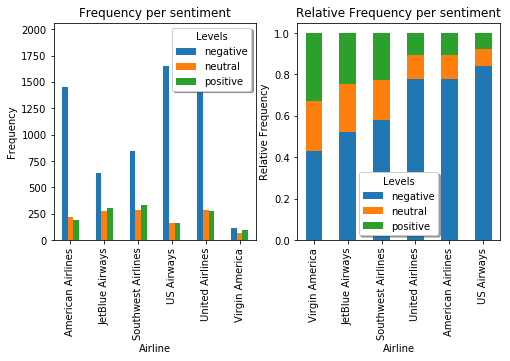

In [51]:
plotdata = df[['airline', 'airline_sentiment', '_unit_id']].groupby(['airline','airline_sentiment']).count().unstack()._unit_id
totaldata = df[['airline', 'airline_sentiment', '_unit_id']].groupby(['airline','airline_sentiment']).count().groupby('airline').sum()._unit_id
relativedata = plotdata.div(totaldata, axis=0).sort_values(by = 'positive', ascending = False)

# Creating the stacked bar chart
fig1 = plt.figure(figsize=plt.figaspect(0.5))

ax1 = fig1.add_subplot(1,2,1)
ax2 = fig1.add_subplot(1,2,2)

plotdata.plot.bar(ax=ax1)
relativedata.plot.bar(stacked=True, ax=ax2)

ax1.set_title('Frequency per sentiment')
ax1.set_xlabel('Airline')
ax1.set_ylabel('Frequency')
ax1.legend(shadow=True, title="Levels");

ax2.set_title('Relative Frequency per sentiment')
ax2.set_xlabel('Airline')
ax2.set_ylabel('Relative Frequency')
ax2.legend(shadow=True, title="Levels");